In [2]:
import pandas as pd
import sys
sys.path.insert(0, "../..")
from utils.simulation import BacktestSimulation, TradingAction
from strategies.leap_strategy import create_leap_strategy
from datetime import datetime, timedelta

# Configuration
ticker = "VOO"
strike_factor = 0.8
interest_rate = 0.05
days = 365
time = days / 365 

tickers = [ticker]
start = datetime(2015, 1, 1)
end = datetime(2024, 12, 31)
initial_cash = 100000

Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2015-01-02 to 2024-12-30
Total trading days: 2515

LEAP STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $100,000.00
Final Value: $867,853.69
Total Return: 767.85%
Sharpe Ratio: 0.65
Max Drawdown: 76.51%
Annualized Volatility: 72.80%

Total transactions: 27

Transaction History:
         date      action ticker  contracts      strike  premium_per_share  total_premium expiration
0  2015-01-02    BUY_CALL    VOO         26  124.573962          37.301351   96983.512726 2016-01-02
1  2015-10-05  CLOSE_CALL    VOO         26  124.573962          30.070329   78182.856499 2016-01-02
2  2015-10-05    BUY_CALL    VOO         20  122.141089          39.622866   79245.732471 2016-10-04
3  2016-07-07  CLOSE_CALL    VOO         20  122.141089          43.296628   86593.256522 2016-10-04
4  2016-07-07    BUY_CALL    VOO         22  131.165942          39.658373   87248.419794 2017-07-07
5  2017-04-10  CLOSE_CALL    VOO         22  131.165942          57.516111

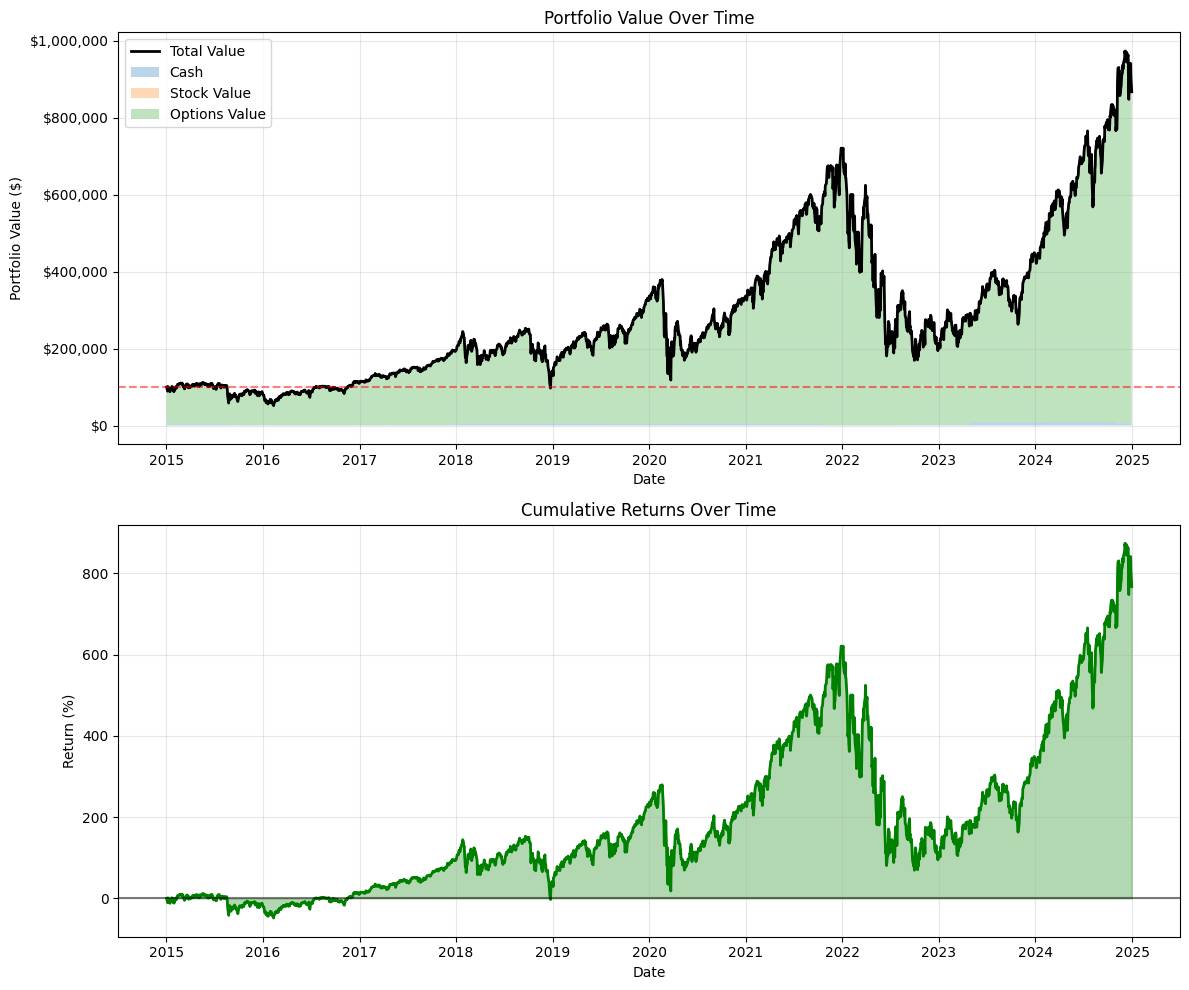

In [3]:
leap_strategy = create_leap_strategy(ticker, strike_factor, days, interest_rate)

# Run LEAP strategy simulation
sim_leap = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=leap_strategy
)

results_leap = sim_leap.run()

print("\n" + "="*50)
print("LEAP STRATEGY PERFORMANCE")
print("="*50)
sim_leap.print_performance_stats()

transactions_leap = sim_leap.get_transactions()
print(f"\nTotal transactions: {len(transactions_leap)}")
print("\nTransaction History:")
print(transactions_leap.to_string())

sim_leap.plot_portfolio_history()

Loading market data...
Running simulation from 2015-01-02 to 2024-12-30
Total trading days: 2515


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



BUY AND HOLD STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $100,000.00
Final Value: $343,124.75
Total Return: 243.12%
Sharpe Ratio: 0.78
Max Drawdown: 33.99%
Annualized Volatility: 17.80%

Total transactions: 1


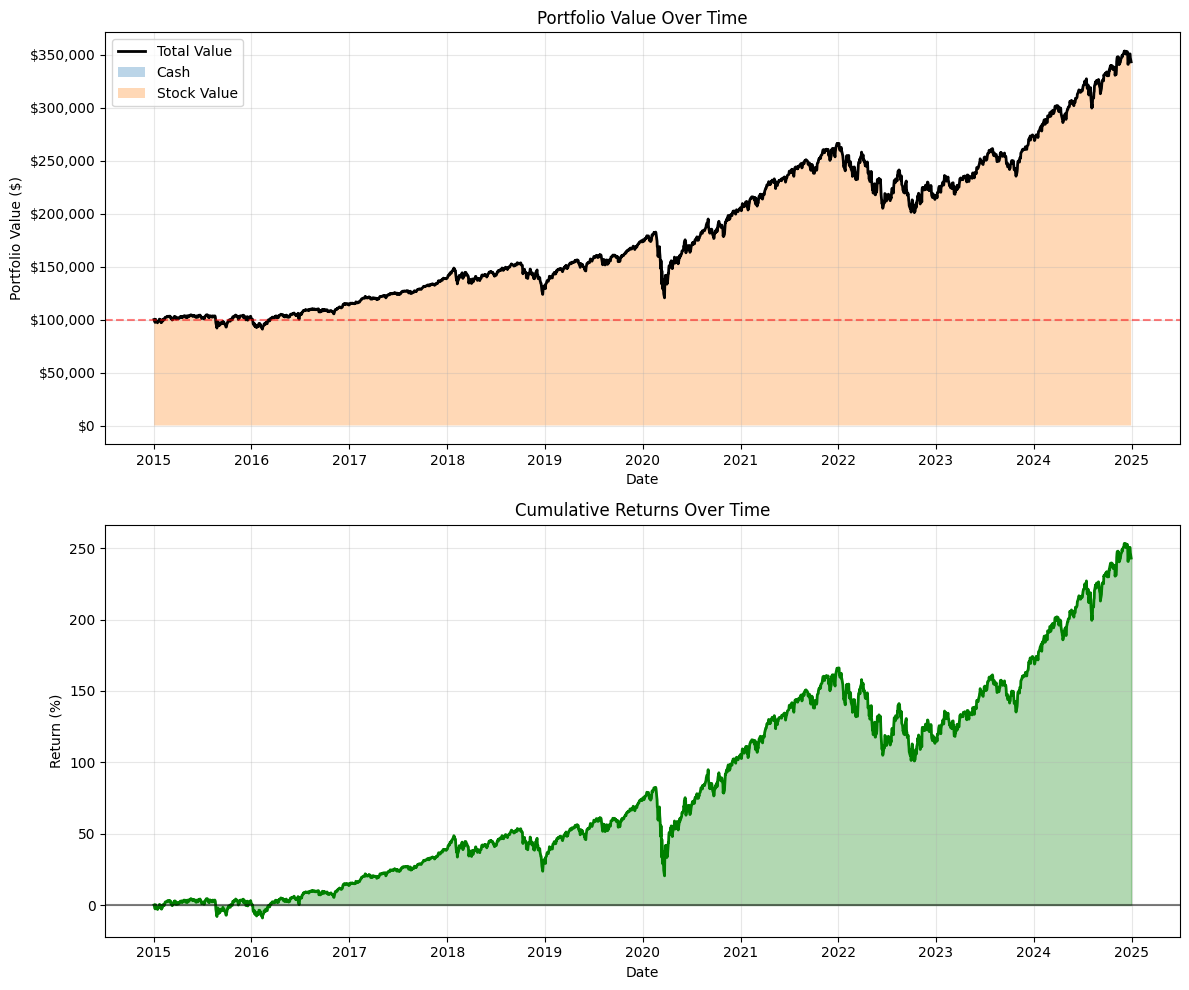

Bad pipe message: %s [b'zilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:145.0) Gecko/20100101 Firefox', b'45.0\r\nAccept: text/plain, */*; q=0.01\r\nAccept-', b'nguage: en-US,en;q=0.5\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nOrigin: h', b'ps://api-ee0b7ac0.duosecurity.com\r\nConnection: keep-alive\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec-Fetch-S']


In [ ]:
# Compare with Buy and Hold strategy
def buy_and_hold(date, portfolio, market_data, actions):
    """Simple buy and hold strategy for comparison"""
    current_price = market_data['prices'][ticker]
    
    # Buy stock with all available cash on first day
    if ticker not in portfolio.positions or portfolio.positions[ticker].shares == 0:
        max_shares = int(portfolio.cash / current_price)
        if max_shares > 0:
            actions.buy_stock(portfolio, ticker, max_shares, current_price)

# Run buy and hold simulation
sim_bh = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=buy_and_hold
)

results_bh = sim_bh.run()

print("\n" + "="*50)
print("BUY AND HOLD STRATEGY PERFORMANCE")
print("="*50)
sim_bh.print_performance_stats()

transactions_bh = sim_bh.get_transactions()
print(f"\nTotal transactions: {len(transactions_bh)}")

sim_bh.plot_portfolio_history()